##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


###<b> Mounting the Drive

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

In [ ]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images_raw = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images_raw.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images_raw = np.array(train_images_raw)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images_raw = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images_raw.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images_raw = np.array(test_images_raw)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [ ]:
# Shape of images
print('Shape of train images =', train_images_raw.shape)
print('Shape of test images =', test_images_raw.shape)

Shape of train images = (24958, 64, 64, 3)
Shape of test images = (2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [ ]:
# Shape of labels 
print('Shape of train labels =', train_labels.shape)
print('Shape of test labels =', test_labels.shape)

Shape of train labels = (24958,)
Shape of test labels = (2600,)


####<b> Observations and insights: 
We have approximately 9.5 times as many training data as we do test data. The usual split for training and test data is approximately 80/20. Therefore, we have proportionally more training data here. However, that is still within an acceptable range.


### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Try to use min and max function from numpy
print(np.max(train_images_raw))
print(np.min(train_images_raw))

255
0


####<b> Observations and insights: 
The pixel values of the images range from 0 to 255 which is completely expected since that is the default range for pixel values. However, we should change the range of pixels to between 0 and 1 to speed up the computation time required.


###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images_raw/255).astype('float32')

test_images = (test_images_raw/255).astype('float32')

####<b> Observations and insights: 
Now that the pixel values are normalized and kept between the range of 0 and 1, we would help to improve computation efficiency of the model

###<b> Count the number of values in both uninfected and parasitized 

In [ ]:
# Try to use value_counts to count the values
import pandas as pd

print('train labels:\n', pd.DataFrame(train_labels).value_counts())
print('\n')
print('test labels:\n', pd.DataFrame(test_labels).value_counts())

train labels:
 1    12582
0    12376
dtype: int64


test labels:
 0    1300
1    1300
dtype: int64


###<b> Plot to check if the data is balanced

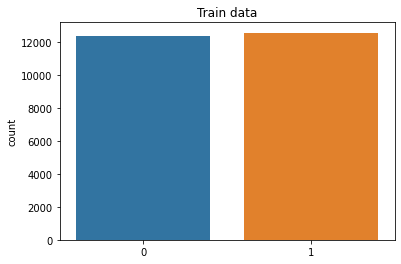

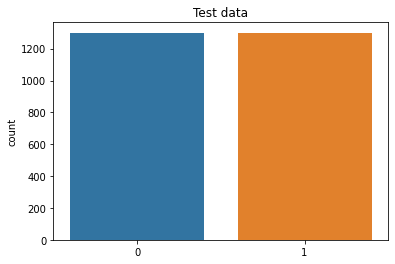

In [ ]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
import seaborn
import matplotlib.pyplot as plt

seaborn.countplot(train_labels)
plt.title('Train data')
plt.show()

seaborn.countplot(test_labels)
plt.title('Test data')
plt.show()


####<b> Observations and insights: 
By having nearly equal numbers of infected and parasitical data, we will improve the model's ability to identify both categories. This reduces the likelihood of undersampling or oversampling.

### <b>Data Exploration</b>
Let's visualize the images from the train data

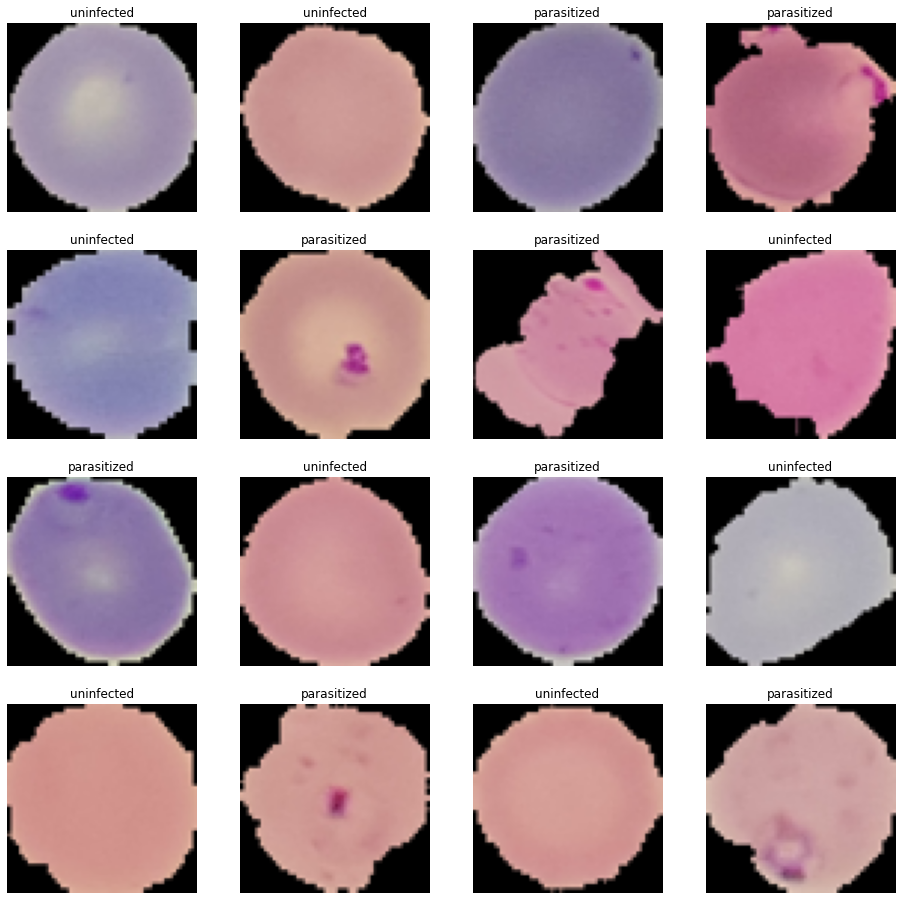

In [ ]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b> Observations and insights: 
All of the images with parasites have a bright purple spot which is absent in all the uninfected images.

###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

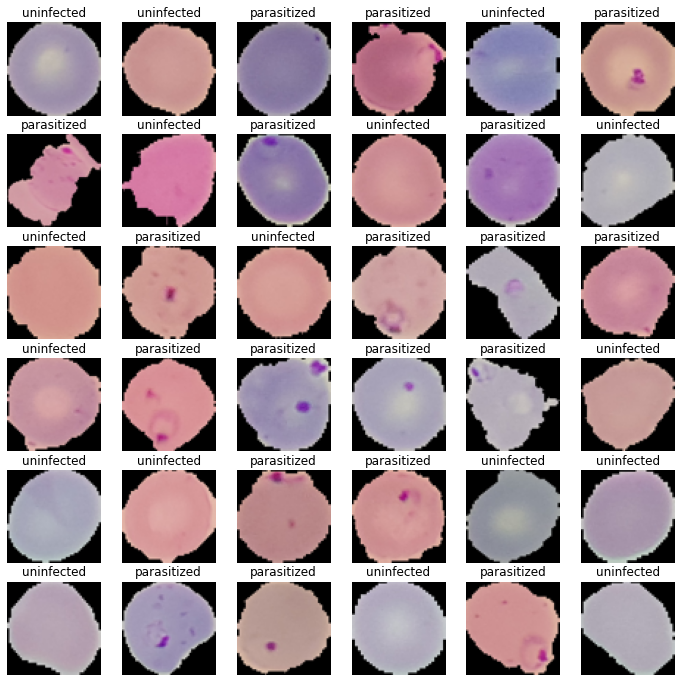

In [ ]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate

np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 37):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b>Observations and insights:
Similarly, most of the parasitized images contain a bright purple stain while the uninfected images do not contain any such stains. Therefore, we can deduce that there is a correlation between purple stains in the images and whether it is a paratisized image.

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

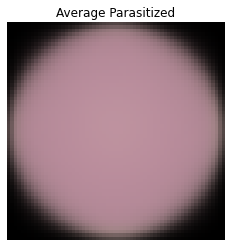

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

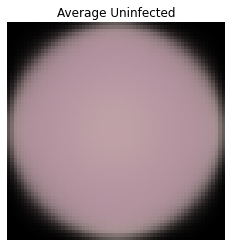

In [ ]:
# Similarly write the code to find the mean image of uninfected
uninfected_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 0:
              
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')



####<b> Observations and insights:
Unfortunately, the mean images of both uninfected and paratisized look similar, although they have a slightly different color shade of pink. Therefore, we cannot really deduce much here. One of the possible reason for the mean image of the parasitized being so even while the individual parasitized images had various stains in random locations could be perhaps because the individual stains average out since they are all located in random spots.

### <b>Processing Images by converting RGB to HSV of Images

###<b> Converting the train data

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


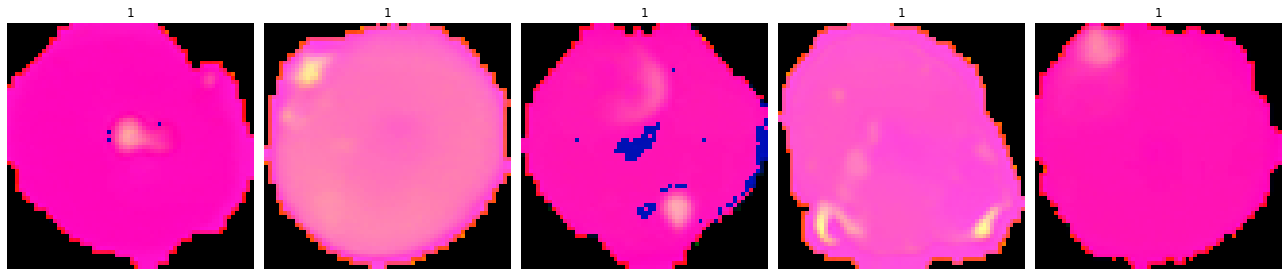

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Converting the test data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


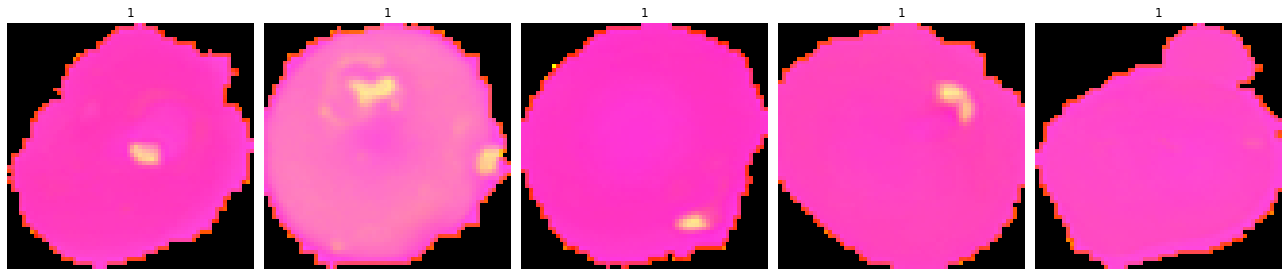

In [ ]:
# Similarly you can visualize for the images in the test data
gfy=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfy.append(a)

gfy = np.array(gfy)

viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfy[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

####<b>Observations and insights:
While some of the images contain clear distinct yellow stains which may represent the parasitized images, there are a few which have very faint yellow patches which may be hard to use to distinguish between parasitized and uninfected images. Therefore, this is not an effective method to use since the difference between parasitized and uninfected images are not clear.

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

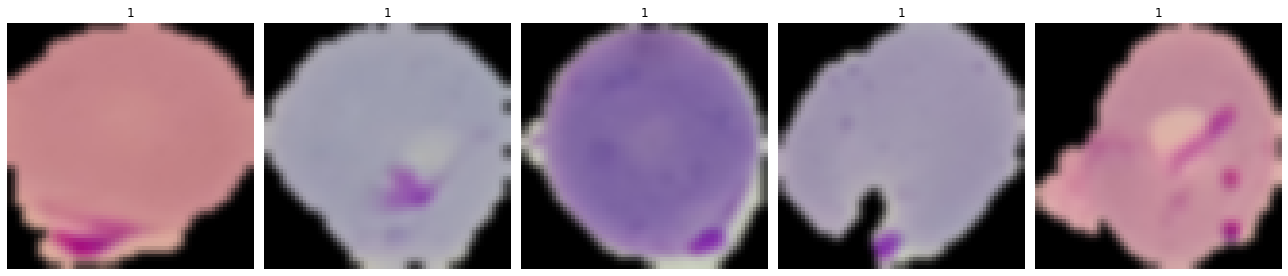

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Gaussian Blurring on test data

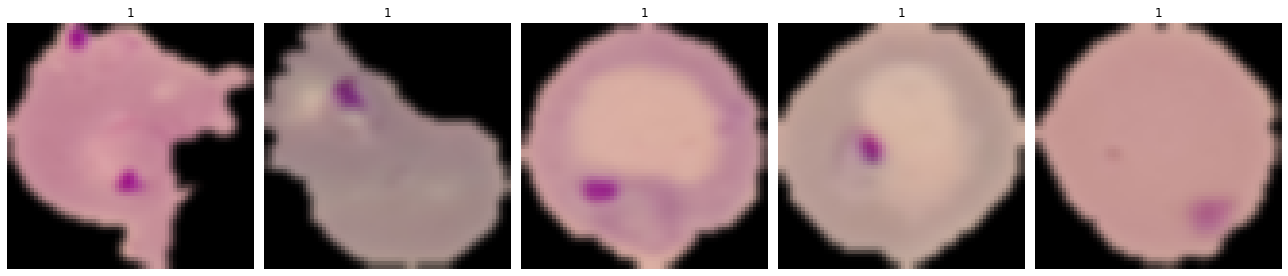

In [ ]:
# Similarly you can apply Gaussian blurring for the images in the test data
gby = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gby.append(b)

gby = np.array(gby)

viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gby[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

####**Observations and insights: **
In contrast to the previous method of converting RGB TO HSV, we can see clear distinct purple stains and patches here which helps us distinguish between parasitized and uninfected images. However, this method does not improve the clear distinction as compared to the original images


###<b> Processing Image using Histogram Equalization

###<b> Train data

In [ ]:
img = []

for i in np.arange(0, 100, 1):
  a = cv2.cvtColor(train_images_raw[i], cv2.COLOR_BGR2YUV)
  a[:,:,0] = cv2.equalizeHist(a[:,:,0])
  hist_eq = cv2.cvtColor(a, cv2.COLOR_YUV2BGR)
  hist_eq = (hist_eq/255).astype('float32')
  img.append(hist_eq)
  
img = np.array(img)

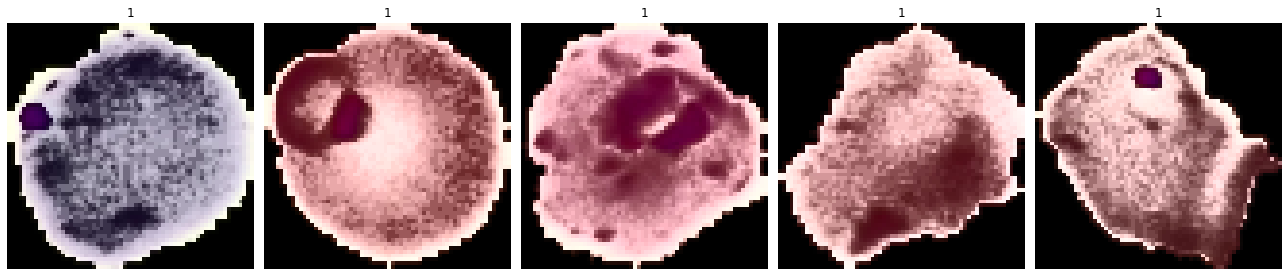

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(img[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Test data

In [ ]:
img = []

for i in np.arange(0, 100, 1):
  a = cv2.cvtColor(test_images_raw[i], cv2.COLOR_BGR2YUV)
  a[:,:,0] = cv2.equalizeHist(a[:,:,0])
  hist_eq = cv2.cvtColor(a, cv2.COLOR_YUV2BGR)
  hist_eq = (hist_eq/255).astype('float32')
  img.append(hist_eq)

img = np.array(img)


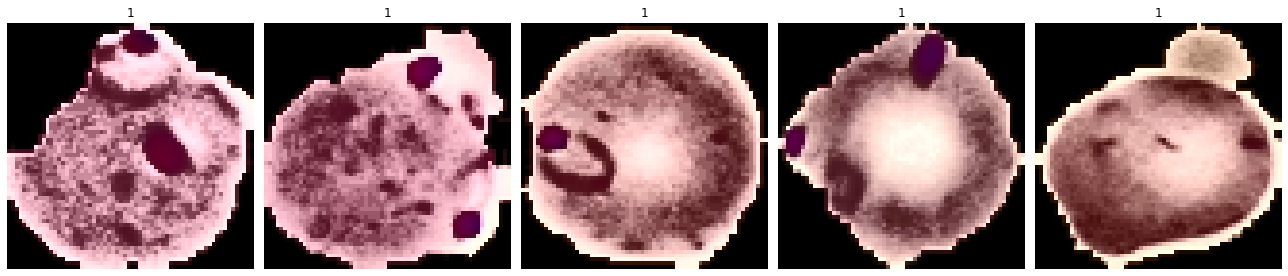

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(img[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

####<b> Observations and insights:
The histogram equalization method is able to show the contrast between the stains and the rest of the RBC much more obviously than the other 2 methods, at least visually. It is therefore a possible image preprocessing method to consider.

###<B>One Hot Encoding on the train and test labels

In [ ]:
from tensorflow.keras.utils import to_categorical

# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

###<b> Importing the required libraries for building and training our Model

In [ ]:
import tensorflow as tf

from tensorflow.keras import optimizers

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, LeakyReLU

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the model

In [ ]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks 

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 15s 8ms/step - loss: 0.4213 - accuracy: 0.7927 - val_loss: 0.1620 - val_accuracy: 0.9515
Epoch 2/20
624/624 [==============================] - 4s 7ms/step - loss: 0.1222 - accuracy: 0.9554 - val_loss: 0.1741 - val_accuracy: 0.9527
Epoch 3/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0912 - accuracy: 0.9700 - val_loss: 0.1316 - val_accuracy: 0.9804
Epoch 4/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0776 - accuracy: 0.9742 - val_loss: 0.0947 - val_accuracy: 0.9876
Epoch 5/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0737 - accuracy: 0.9751 - val_loss: 0.1156 - val_accuracy: 0.9814
Epoch 6/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0684 - accuracy: 0.9772 - val_loss: 0.0976 - val_accuracy: 0.9826


###<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0974 - accuracy: 0.9712

 Test_Accuracy:- 0.9711538553237915


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1300
           1       0.98      0.96      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



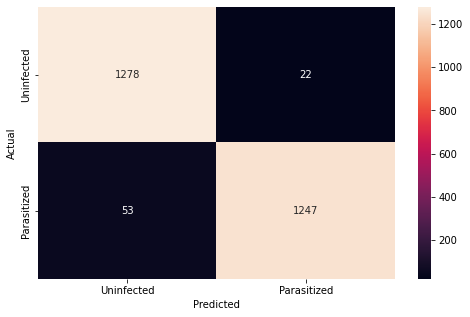

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [ ]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

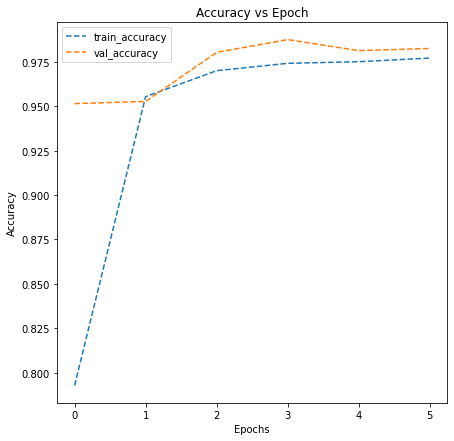

In [ ]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
# Creating sequential model
model1 = Sequential()




# Build the model here and add new layers
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 16, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 16, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(512, activation = "relu"))

model1.add(Dropout(0.4))

model1.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 





model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks,  validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 6s 9ms/step - loss: 0.3642 - accuracy: 0.8188 - val_loss: 0.0647 - val_accuracy: 0.9894
Epoch 2/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0940 - accuracy: 0.9678 - val_loss: 0.0860 - val_accuracy: 0.9828
Epoch 3/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0796 - accuracy: 0.9727 - val_loss: 0.0926 - val_accuracy: 0.9760


###<b> Evaluating the model

In [ ]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0553 - accuracy: 0.9823

 Test_Accuracy:- 0.9823076725006104


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



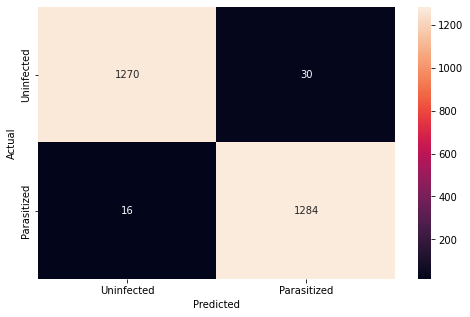

In [ ]:
pred1 = model1.predict(test_images)

pred1 = np.argmax(pred1, axis = 1) 

y_true1 = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true1, pred1))

# Plotting the heatmap using confusion matrix
cm1 = confusion_matrix(y_true1, pred1)

plt.figure(figsize = (8, 5))

sns.heatmap(cm1, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

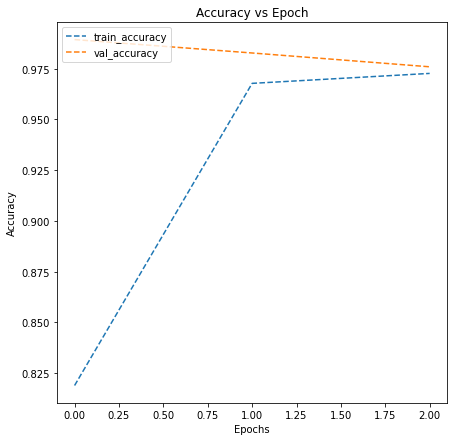

In [ ]:
plot_accuracy(history1)

###<b> Model 2 with Batch Normalization

In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

model2.add(LeakyReLU())

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))

model2.add(LeakyReLU())

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))

model2.add(LeakyReLU())

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 16, kernel_size = 2, padding = "same"))

model2.add(LeakyReLU())

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 16, kernel_size = 2, padding = "same"))

model2.add(LeakyReLU())

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(512))

model2.add(LeakyReLU())

model2.add(Dropout(0.4))

model2.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons



adam = optimizers.Adam(learning_rate = 0.001)

model2.summary()

 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                        

###<b>Compiling the model

In [ ]:
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 7s 9ms/step - loss: 0.4767 - accuracy: 0.7527 - val_loss: 0.0691 - val_accuracy: 0.9940
Epoch 2/20
624/624 [==============================] - 8s 13ms/step - loss: 0.1179 - accuracy: 0.9584 - val_loss: 0.0812 - val_accuracy: 0.9862
Epoch 3/20
624/624 [==============================] - 7s 11ms/step - loss: 0.0933 - accuracy: 0.9691 - val_loss: 0.0753 - val_accuracy: 0.9858


<b>Plotting the train and validation accuracy

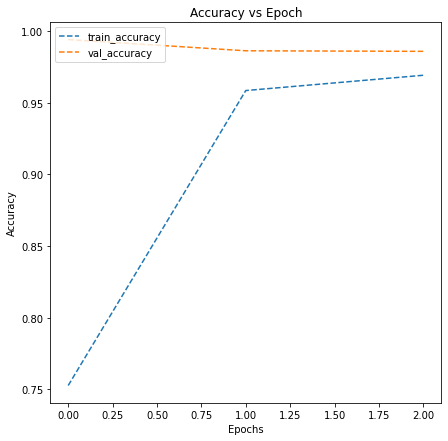

In [ ]:
# Plotting the accuracies
plot_accuracy(history2)

###<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy = model2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0925 - accuracy: 0.9727

 Test_Accuracy:- 0.9726923108100891


####<b>Observations and insights: ____

<b> Generate the classification report and confusion matrix 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1300
           1       0.98      0.97      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



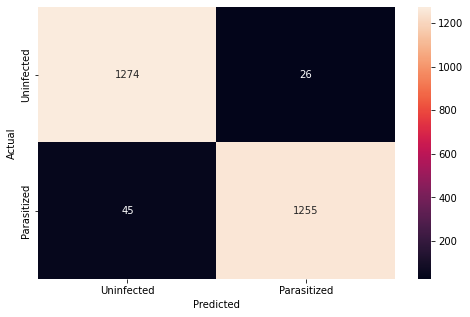

In [ ]:
pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###<b>Model 3 with Data Augmentation

In [ ]:
backend.clear_session() # Clearing backend for new model

###<b> Using image data generator

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

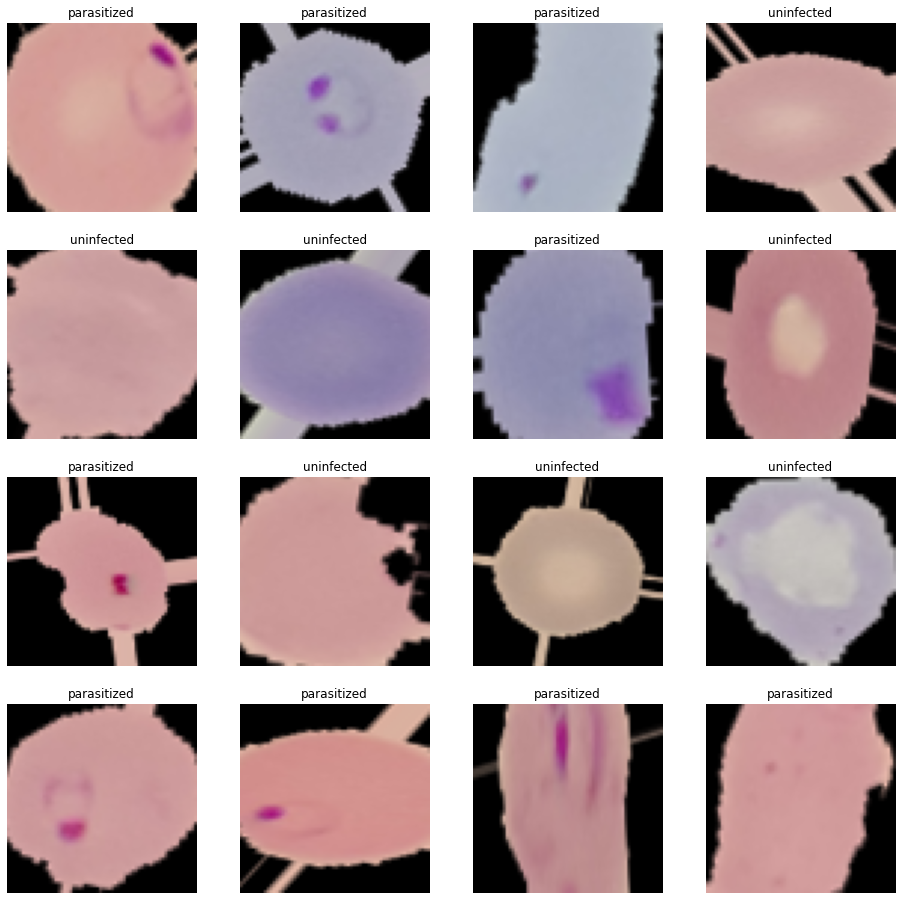

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

####<b>Observations and insights: ____

###<b>Building the Model

In [ ]:
model3 = Sequential()

# Build the model here
model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 16, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 16, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(512, activation = "relu"))

model3.add(Dropout(0.4))

model3.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

# Use this as the optimizer
adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator, 
                                  validation_data = val_generator,
                                  batch_size = 32, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 24s 72ms/step - loss: 0.6591 - accuracy: 0.5905 - val_loss: 0.3713 - val_accuracy: 0.9225
Epoch 2/20
312/312 [==============================] - 23s 75ms/step - loss: 0.2481 - accuracy: 0.9061 - val_loss: 0.1131 - val_accuracy: 0.9708
Epoch 3/20
312/312 [==============================] - 22s 71ms/step - loss: 0.1815 - accuracy: 0.9360 - val_loss: 0.0876 - val_accuracy: 0.9776
Epoch 4/20
312/312 [==============================] - 25s 81ms/step - loss: 0.1688 - accuracy: 0.9432 - val_loss: 0.0805 - val_accuracy: 0.9784
Epoch 5/20
312/312 [==============================] - 22s 72ms/step - loss: 0.1667 - accuracy: 0.9439 - val_loss: 0.0784 - val_accuracy: 0.9782
Epoch 6/20
312/312 [==============================] - 22s 71ms/step - loss: 0.1586 - accuracy: 0.9472 - val_loss: 0.0813 - val_accuracy: 0.9792
Epoch 7/20
312/312 [==============================] - 22s 71ms/step - loss: 0.1590 - accuracy: 0.9463 - val_loss: 0.0745 - val_accuracy:

###<B>Evaluating the model

<b>Plot the train and validation accuracy

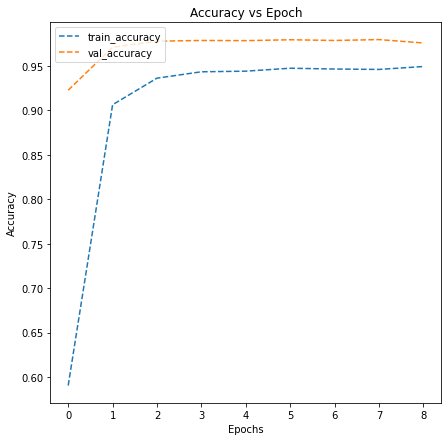

In [ ]:
# Potting the accuracies
plot_accuracy(history3)

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0757 - accuracy: 0.9796

 Test_Accuracy:- 0.9796153903007507


<B>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



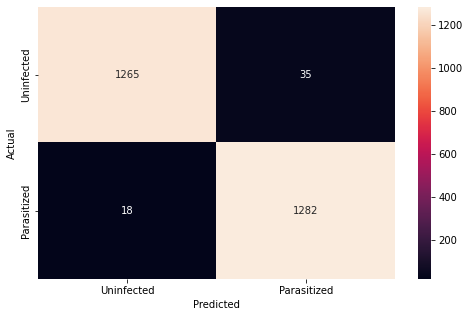

In [ ]:
pred = model3.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###<b> Testing the model with the preprocessed image using the histogram equalization method

In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
train_images_histeq = []

for i in range(len(train_images_raw)):
  a = cv2.cvtColor(train_images_raw[i], cv2.COLOR_BGR2YUV)
  a[:,:,0] = cv2.equalizeHist(a[:,:,0])
  hist_eq = cv2.cvtColor(a, cv2.COLOR_YUV2BGR)
  hist_eq = (hist_eq/255).astype('float32')
  train_images_histeq.append(hist_eq)
  
train_images_histeq = np.array(train_images_histeq)


test_images_histeq = []

for i in range(len(test_images_raw)):
  a = cv2.cvtColor(test_images_raw[i], cv2.COLOR_BGR2YUV)
  a[:,:,0] = cv2.equalizeHist(a[:,:,0])
  hist_eq = cv2.cvtColor(a, cv2.COLOR_YUV2BGR)
  hist_eq = (hist_eq/255).astype('float32')
  test_images_histeq.append(hist_eq)

test_images_histeq = np.array(test_images_histeq)


In [ ]:
X_train_histeq, X_val, y_train_histeq, y_val = train_test_split(train_images_histeq, train_labels, test_size = 0.2, random_state = 42)

# Flowing training images using train_datagen generator
train_generator_histeq = train_datagen.flow(x = X_train_histeq, y = y_train_histeq, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

<b> Fit and Train the model

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

history3_histeq = model3.fit(train_generator_histeq, 
                                  validation_data = val_generator,
                                  batch_size = 32, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 25s 78ms/step - loss: 0.1898 - accuracy: 0.9300 - val_loss: 0.0855 - val_accuracy: 0.9734
Epoch 2/20
312/312 [==============================] - 22s 71ms/step - loss: 0.1727 - accuracy: 0.9402 - val_loss: 0.0998 - val_accuracy: 0.9665
Epoch 3/20
312/312 [==============================] - 22s 71ms/step - loss: 0.1651 - accuracy: 0.9440 - val_loss: 0.0849 - val_accuracy: 0.9746
Epoch 4/20
312/312 [==============================] - 22s 72ms/step - loss: 0.1609 - accuracy: 0.9447 - val_loss: 0.0722 - val_accuracy: 0.9768
Epoch 5/20
312/312 [==============================] - 22s 71ms/step - loss: 0.1560 - accuracy: 0.9472 - val_loss: 0.0749 - val_accuracy: 0.9774
Epoch 6/20
312/312 [==============================] - 22s 71ms/step - loss: 0.1523 - accuracy: 0.9486 - val_loss: 0.0747 - val_accuracy: 0.9764


<B>Plotting the classification report and confusion matrix

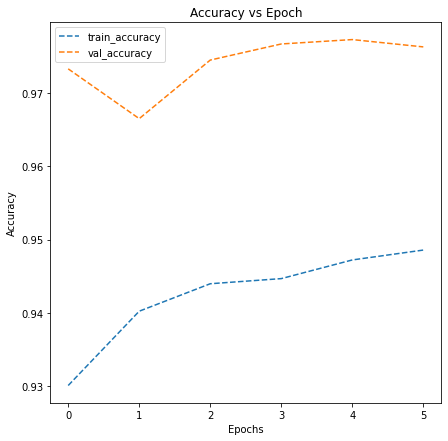

In [ ]:
# Potting the accuracies
plot_accuracy(history3_histeq)

In [ ]:
# Evaluating the model on test data
accuracy3_histeq = model3.evaluate(test_images_histeq, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 0s 5ms/step - loss: 0.0803 - accuracy: 0.9769

 Test_Accuracy:- 0.9796153903007507


<B>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1300
           1       0.97      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



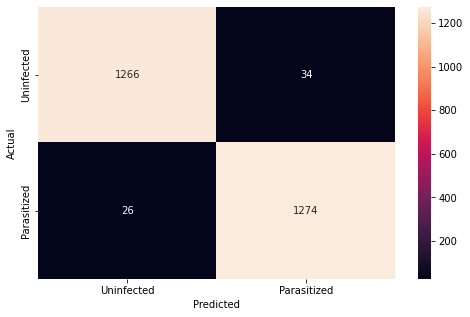

In [ ]:
pred3_histeq = model3.predict(test_images_histeq)

pred3_histeq = np.argmax(pred3_histeq, axis = 1) 

y_true3 = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true3, pred3_histeq))

# Plotting the heatmap using confusion matrix
cm3_histeq = confusion_matrix(y_true3, pred3_histeq)

plt.figure(figsize = (8, 5))

sns.heatmap(cm3_histeq, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

### **Pre-trained model (VGG16)**

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

###<b>Compiling the model

In [ ]:
# Compiling the model 
model4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
# Fitting the model and running the model for 10 epochs
history4 = model4.fit(
            train_images,
            train_labels,
            callbacks = callbacks,
            epochs = 10,
            verbose = 1)

Epoch 1/10
780/780 [==============================] - 19s 20ms/step - loss: 0.2174 - accuracy: 0.9189
Epoch 2/10
780/780 [==============================] - 15s 19ms/step - loss: 0.1834 - accuracy: 0.9312
Epoch 3/10
780/780 [==============================] - 15s 19ms/step - loss: 0.1787 - accuracy: 0.9341
Epoch 4/10
780/780 [==============================] - 15s 19ms/step - loss: 0.1720 - accuracy: 0.9360
Epoch 5/10
780/780 [==============================] - 15s 19ms/step - loss: 0.1669 - accuracy: 0.9398
Epoch 6/10
780/780 [==============================] - 15s 19ms/step - loss: 0.1640 - accuracy: 0.9400
Epoch 7/10
780/780 [==============================] - 15s 19ms/step - loss: 0.1643 - accuracy: 0.9386
Epoch 8/10
780/780 [==============================] - 15s 19ms/step - loss: 0.1594 - accuracy: 0.9419
Epoch 9/10
780/780 [==============================] - 15s 19ms/step - loss: 0.1549 - accuracy: 0.9450
Epoch 10/10
780/780 [==============================] - 15s 19ms/step - loss: 0.158

###**Observations and insights: _____**

*   What can be observed from the validation and train curves?

###<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 2s 23ms/step - loss: 0.1301 - accuracy: 0.9550

 Test_Accuracy:- 0.9549999833106995


<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1300
           1       0.97      0.94      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.96      0.96      0.95      2600
weighted avg       0.96      0.95      0.95      2600



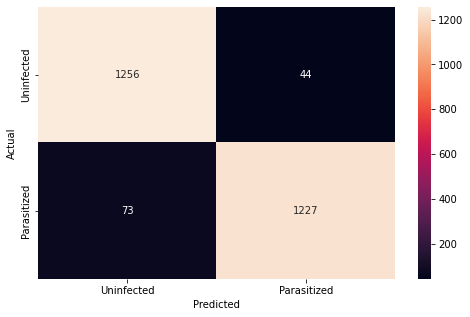

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html /content/Final.ipynb

[NbConvertApp] Converting notebook /content/Final.ipynb to html
[NbConvertApp] Writing 2542079 bytes to /content/Final.html
